# 📊 Unemployment Analysis in India

This notebook analyzes unemployment trends in India using data visualization and statistical techniques. The objective is to understand the impact of various factors and observe changes over time.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [10]:
df = pd.read_csv('Unemployment in India.csv')
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
#replace ? and nan 
df.replace('?',np.nan,inplace=True)

In [12]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
#Drop rows with missing values (if minimal)
df.dropna(inplace=True)

In [17]:
df.columns=df.columns.str.strip()

In [18]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

## 🧹 Data Cleaning and Feature Engineering

In [23]:
# Convert 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019


## 📈 Data Visualization

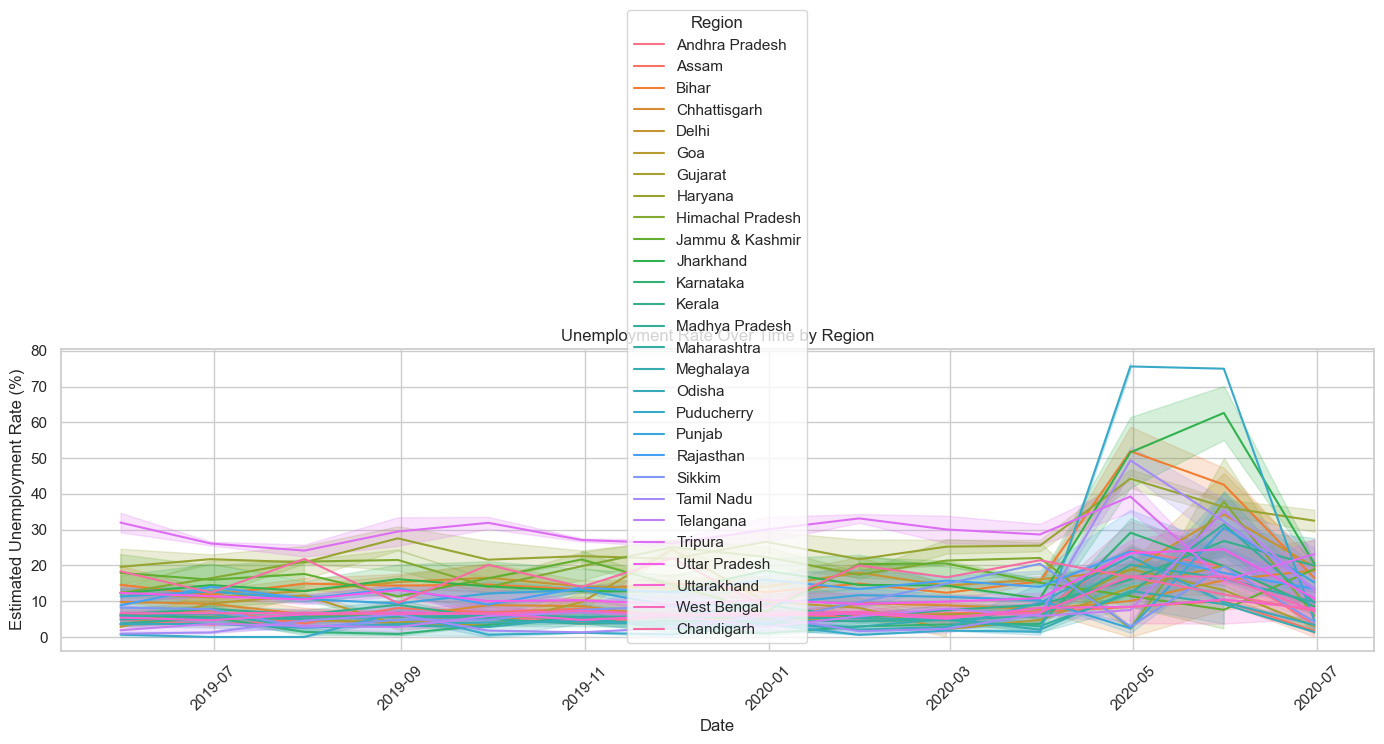

In [24]:
# Trend of Unemployment Rate Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

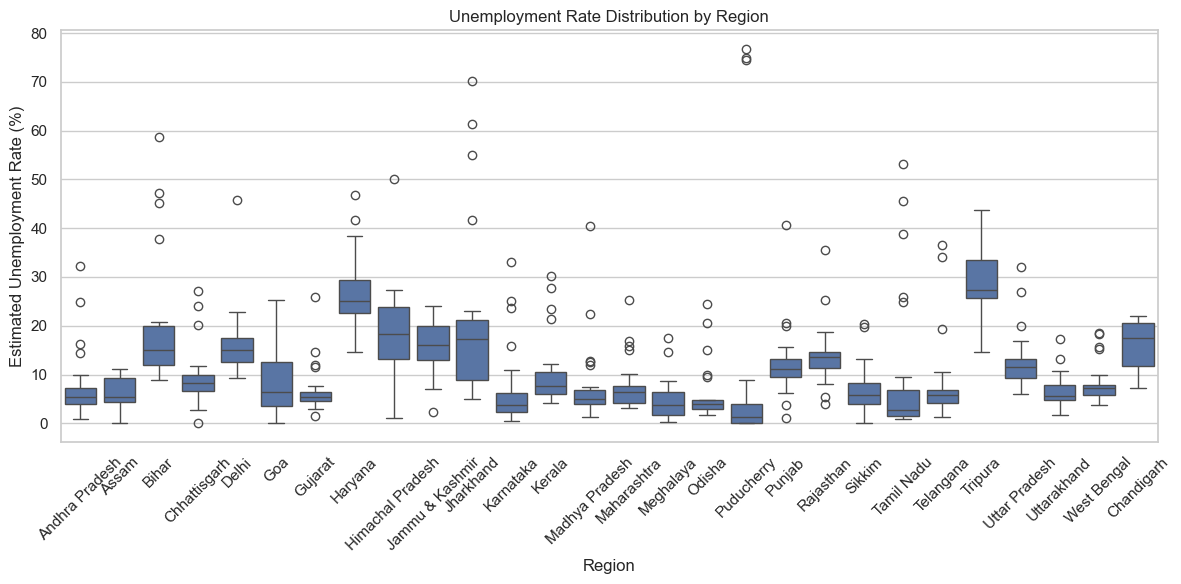

In [25]:
# Distribution of Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

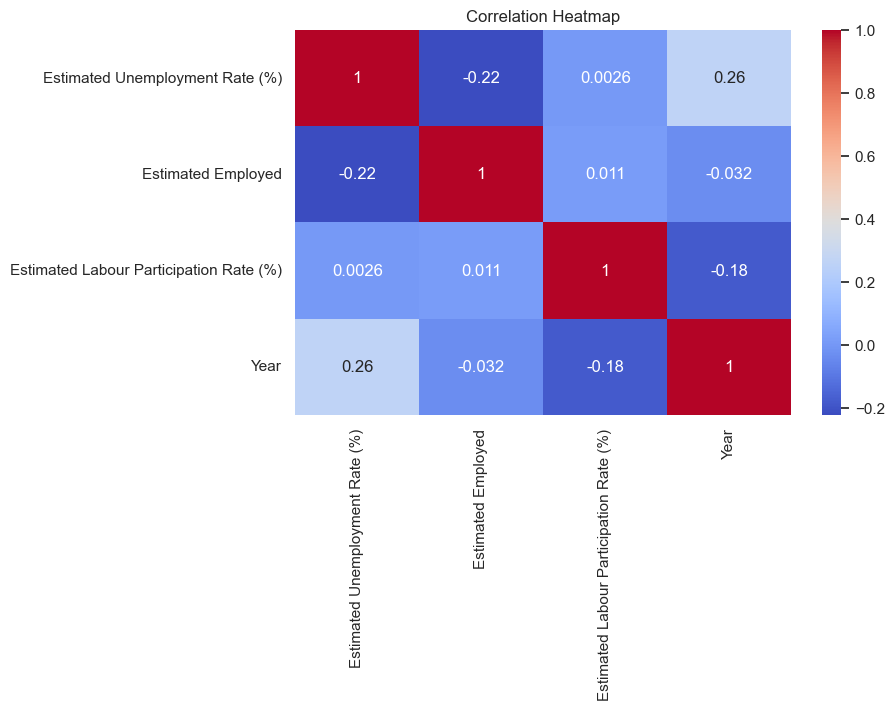

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## ✅ Conclusion

- Some regions show consistently higher unemployment rates.
- There are seasonal and regional trends observable in the data.
- Further analysis could include correlation with economic or demographic indicators.